In [1]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [22]:
adata = scv.read('/media/chang/HDD-5/chang2/gast_alevin.h5ad')

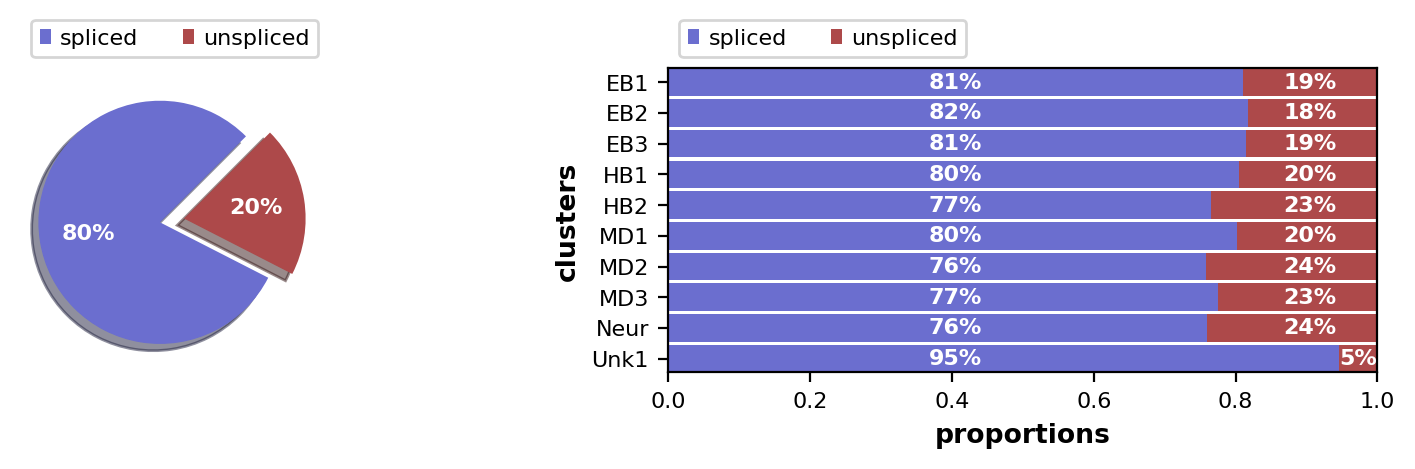

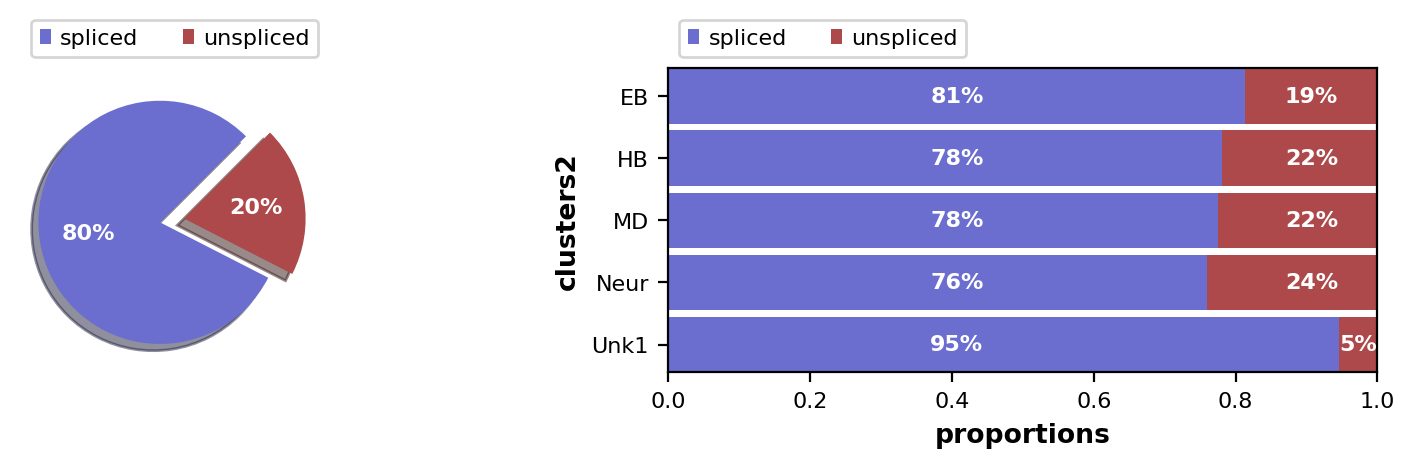

In [23]:
adata.obs['clusters'] = adata.obs['clusters'].astype('category')
scv.pl.proportions(adata, groupby='clusters')
scv.pl.proportions(adata, groupby='clusters2')

In [24]:
scv.pp.filter_and_normalize(adata, min_shared_counts=5, n_top_genes=3000, enforce=True)

Filtered out 15847 genes that are detected 5 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.


computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


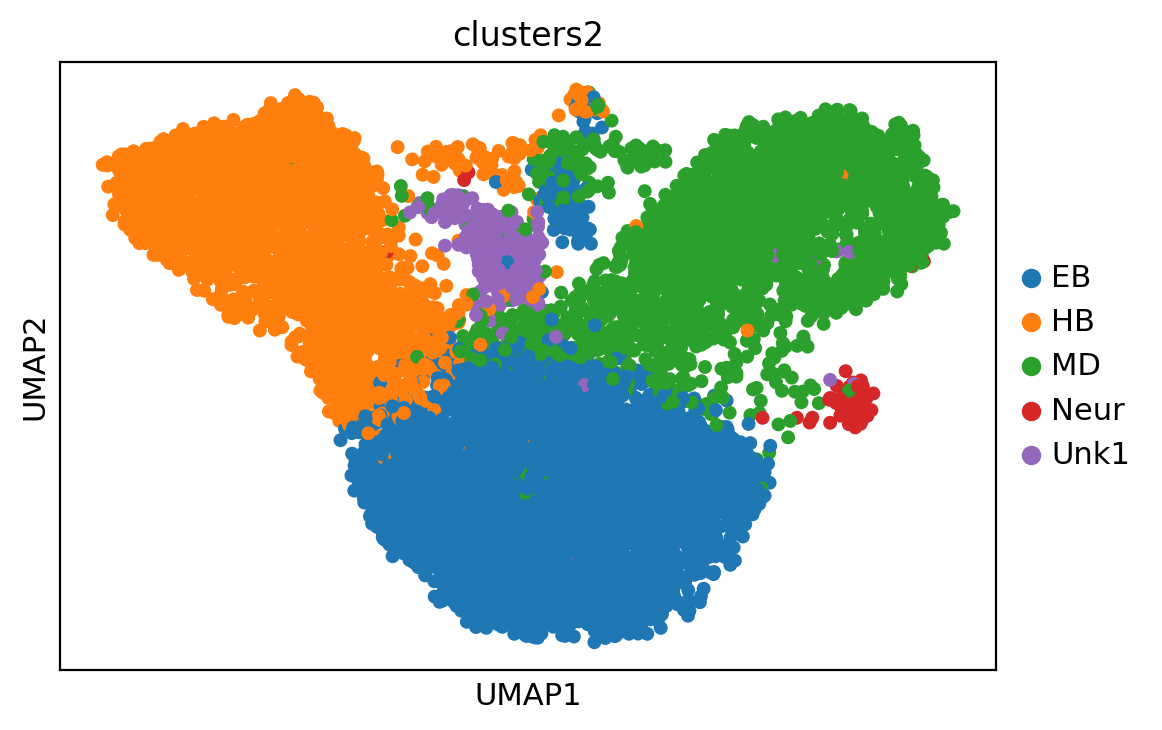

In [25]:
#scv.pp.moments(adata, n_pcs=30)
sc.tl.umap(adata, min_dist=.7)
sc.pl.umap(adata, color=['clusters2'], size=100)

In [26]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/128 cores)



    finished (0:00:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


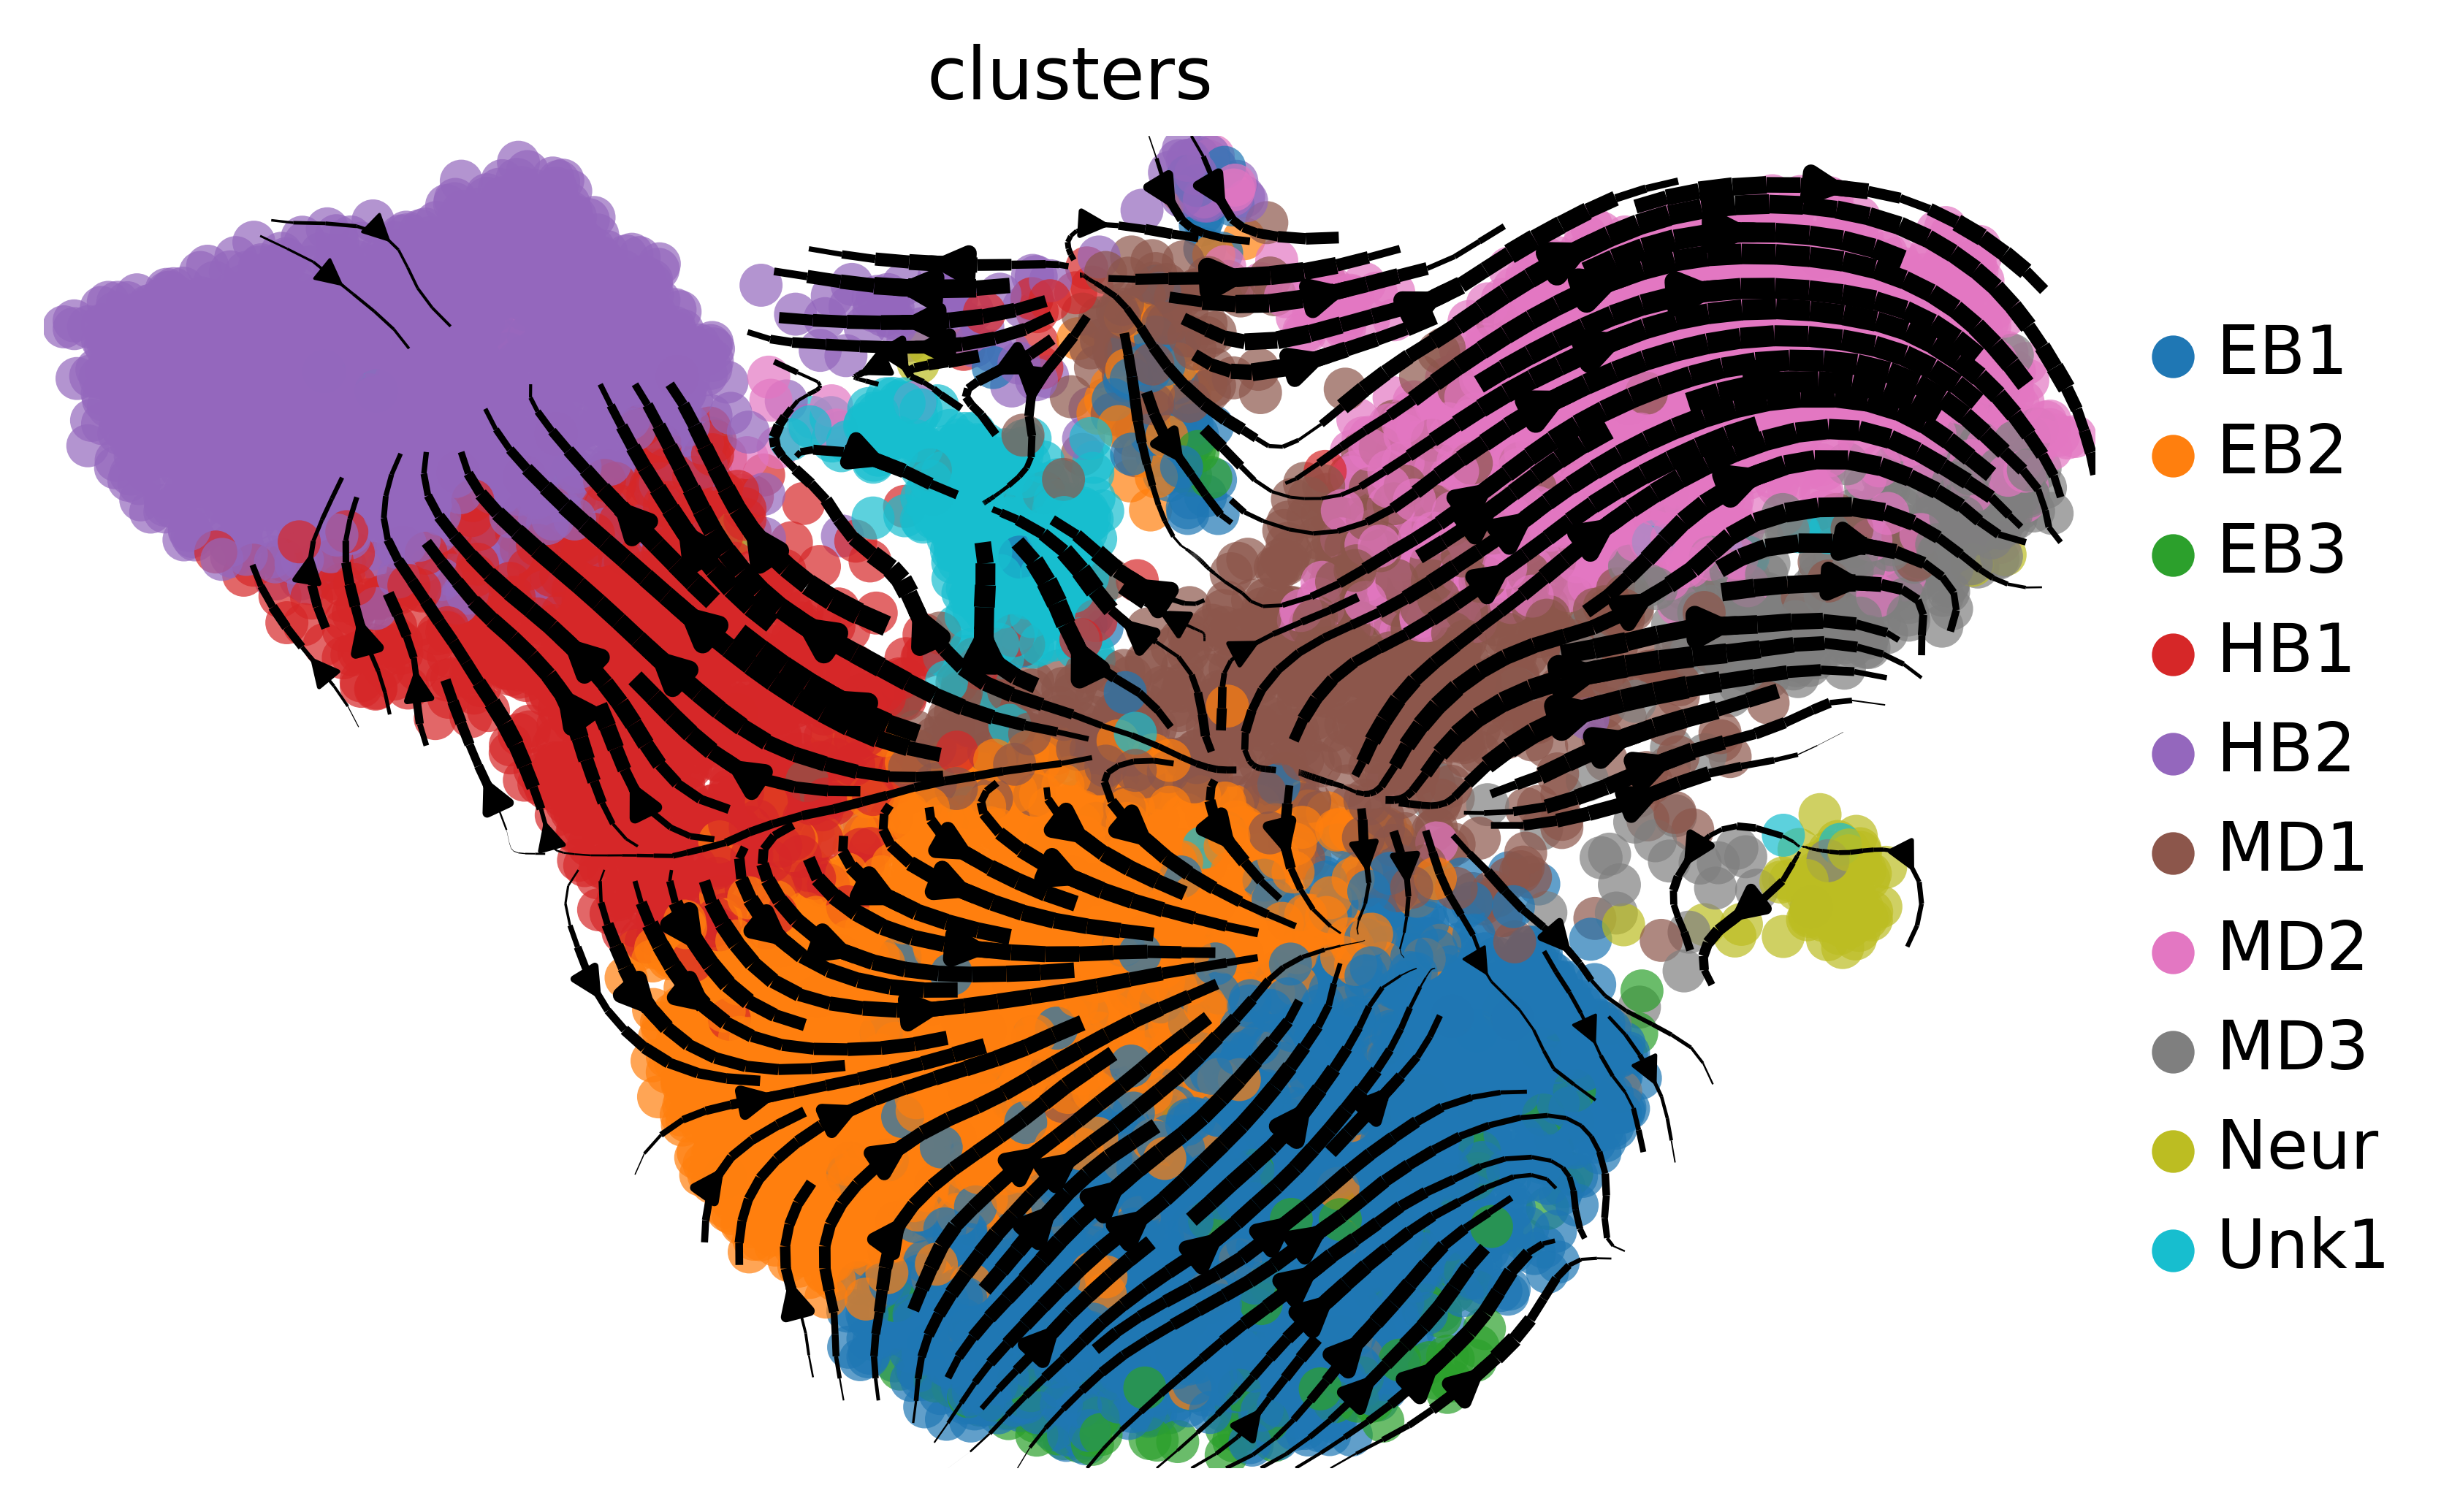

In [27]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=300, linewidth=2,  alpha=.7, size=200,color='clusters', frameon=False)#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

In [28]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:50]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters2')

testing for differential kinetics
    finished (0:00:13) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pval_kinetics', p-values of differential kinetics (adata.var)


In [29]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


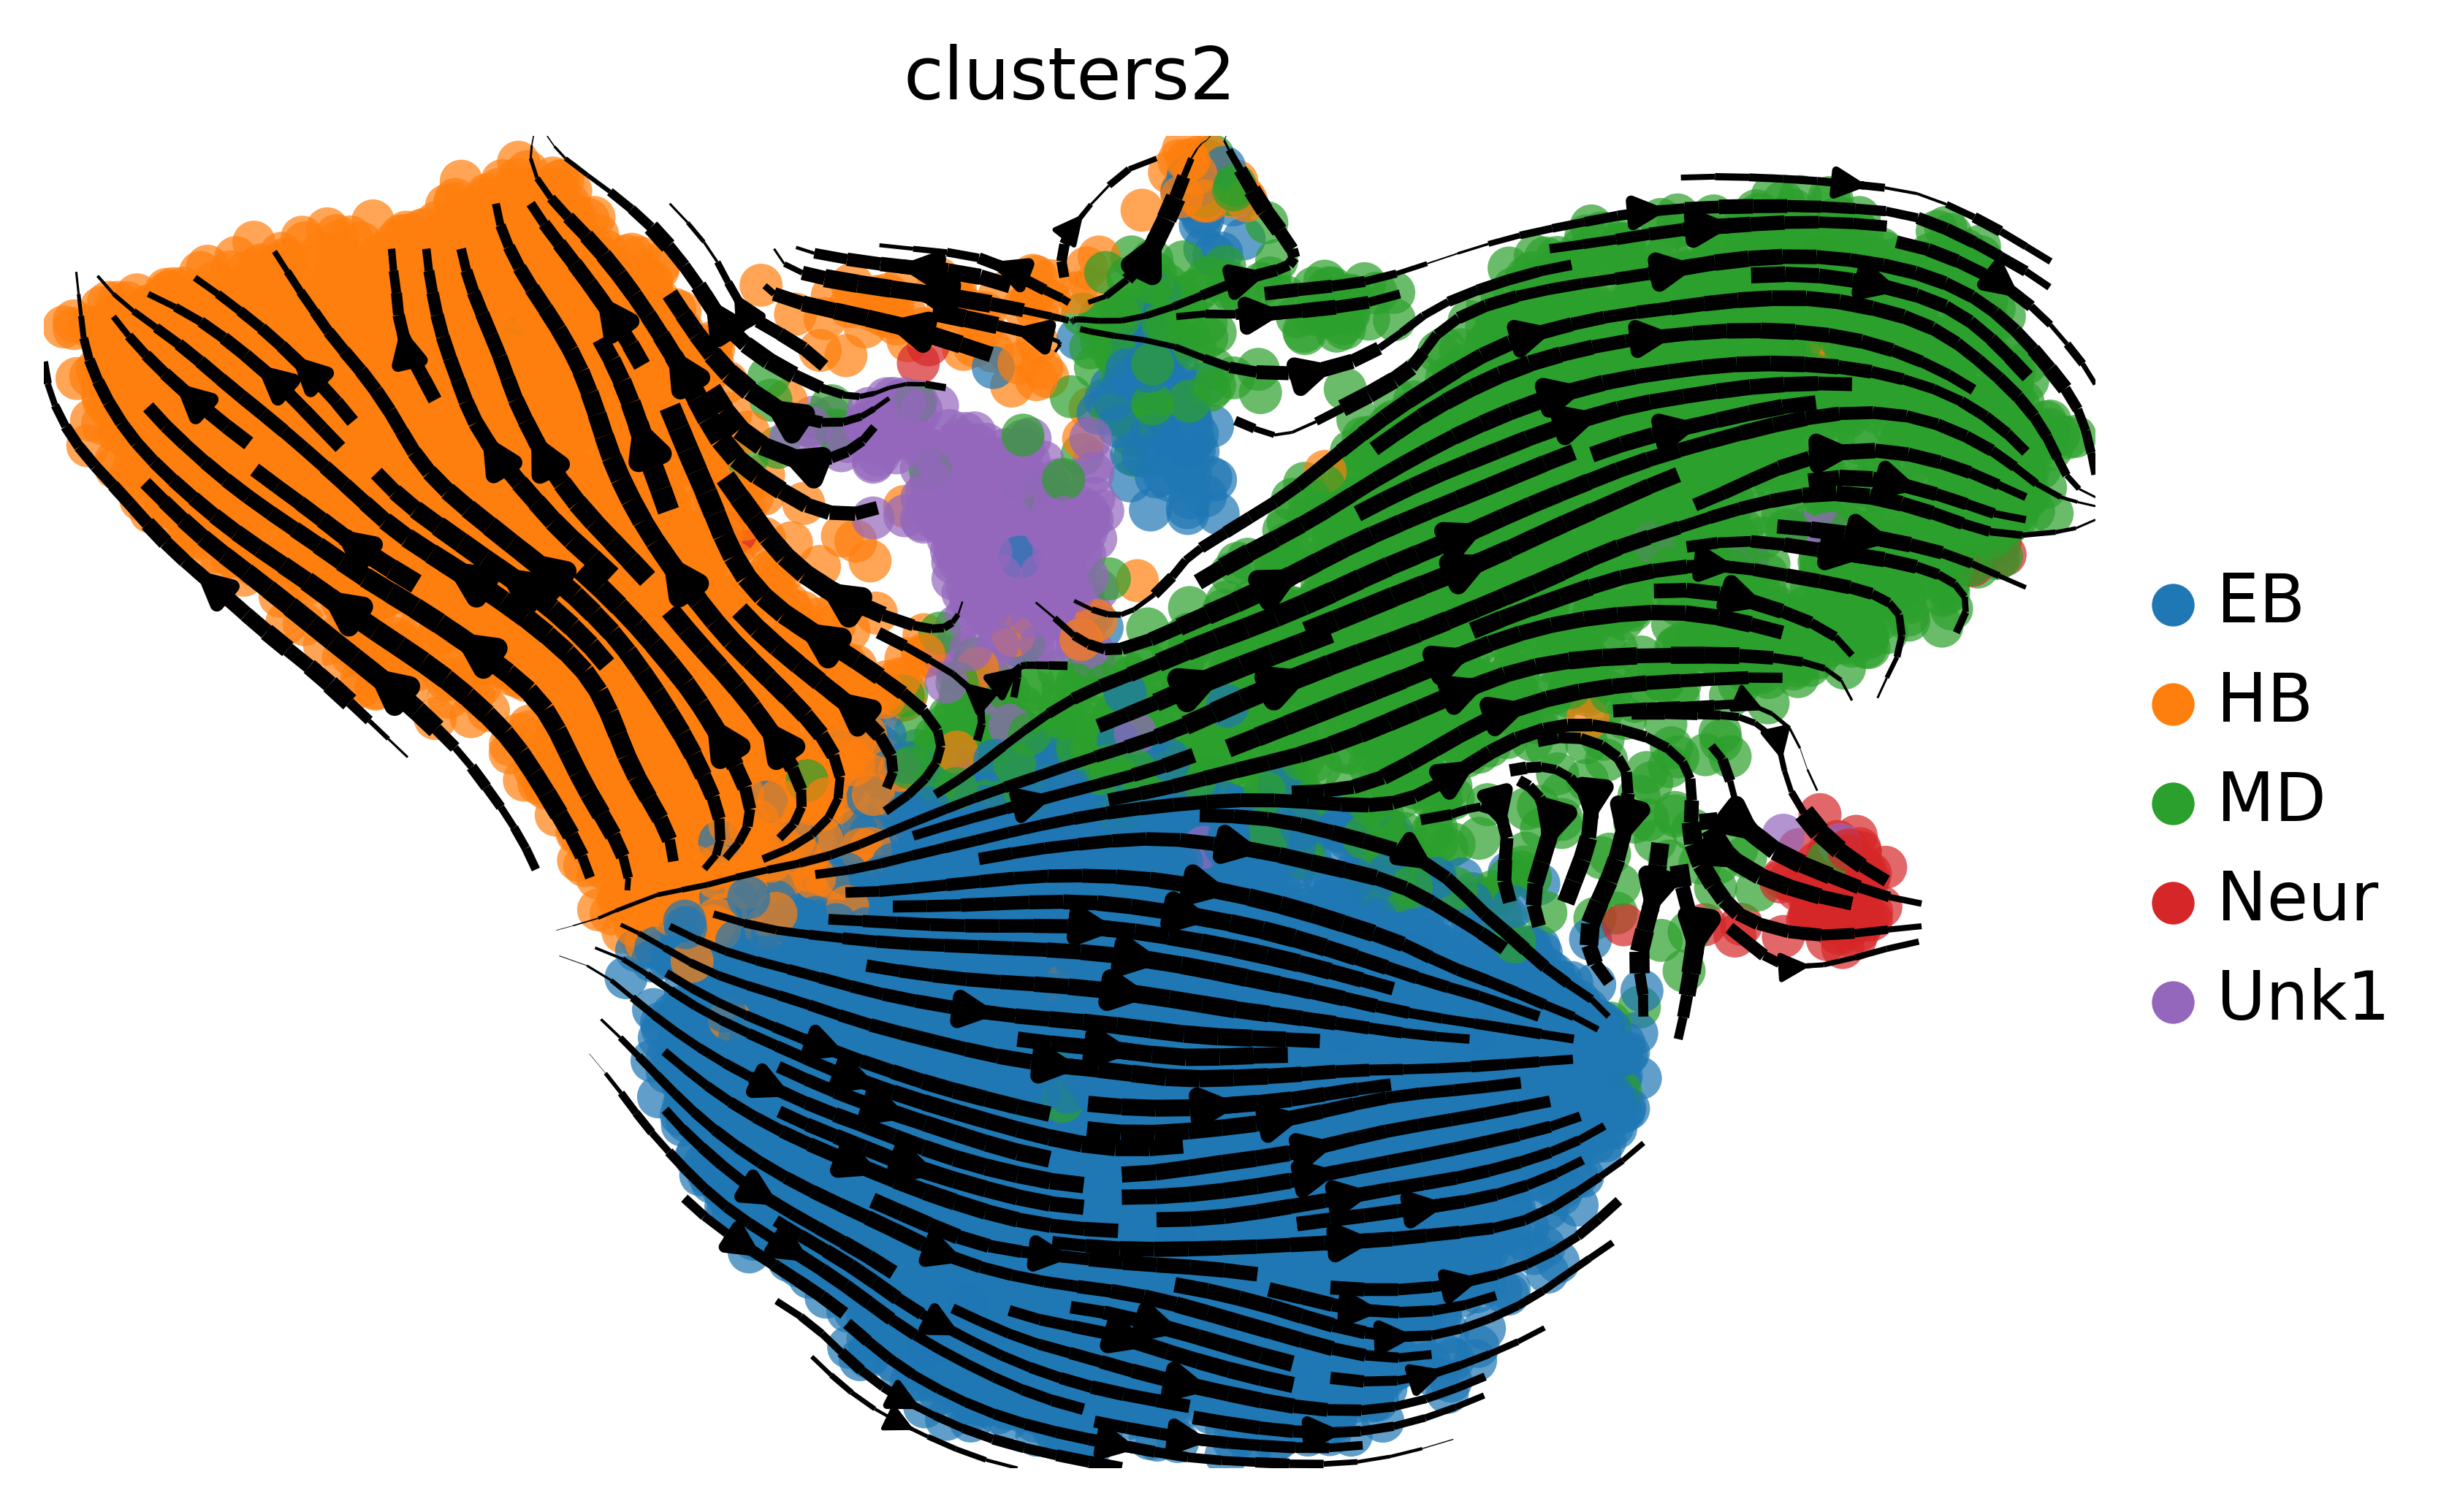

In [40]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=300, linewidth=2,  alpha=.7, size=200,color='clusters2', frameon=False)#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


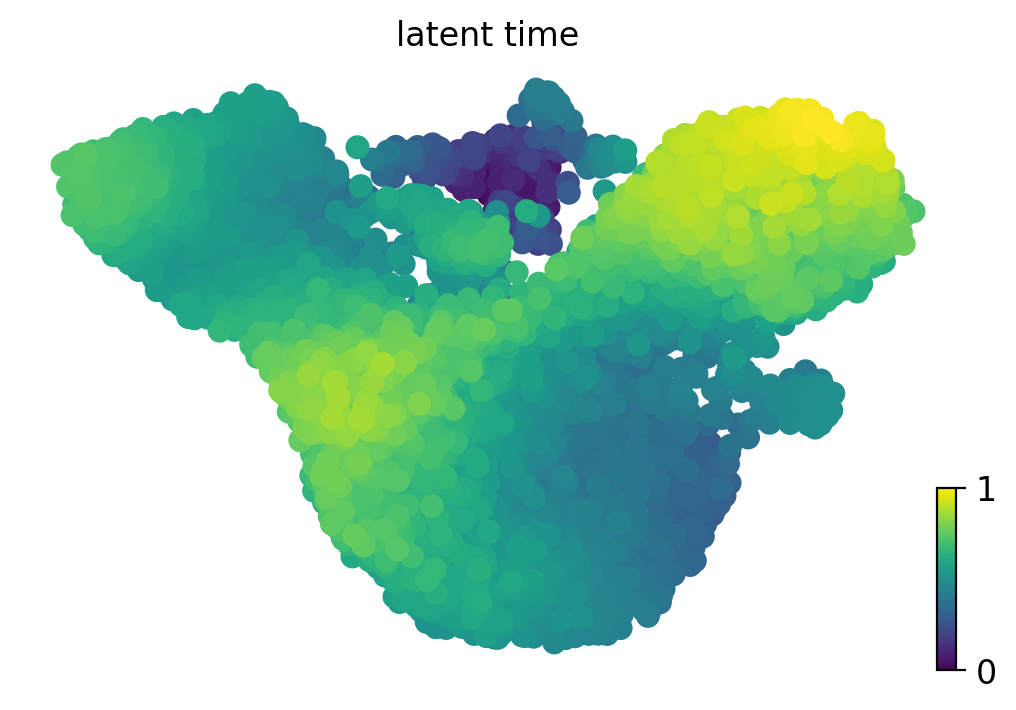

In [31]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='viridis', size=300)

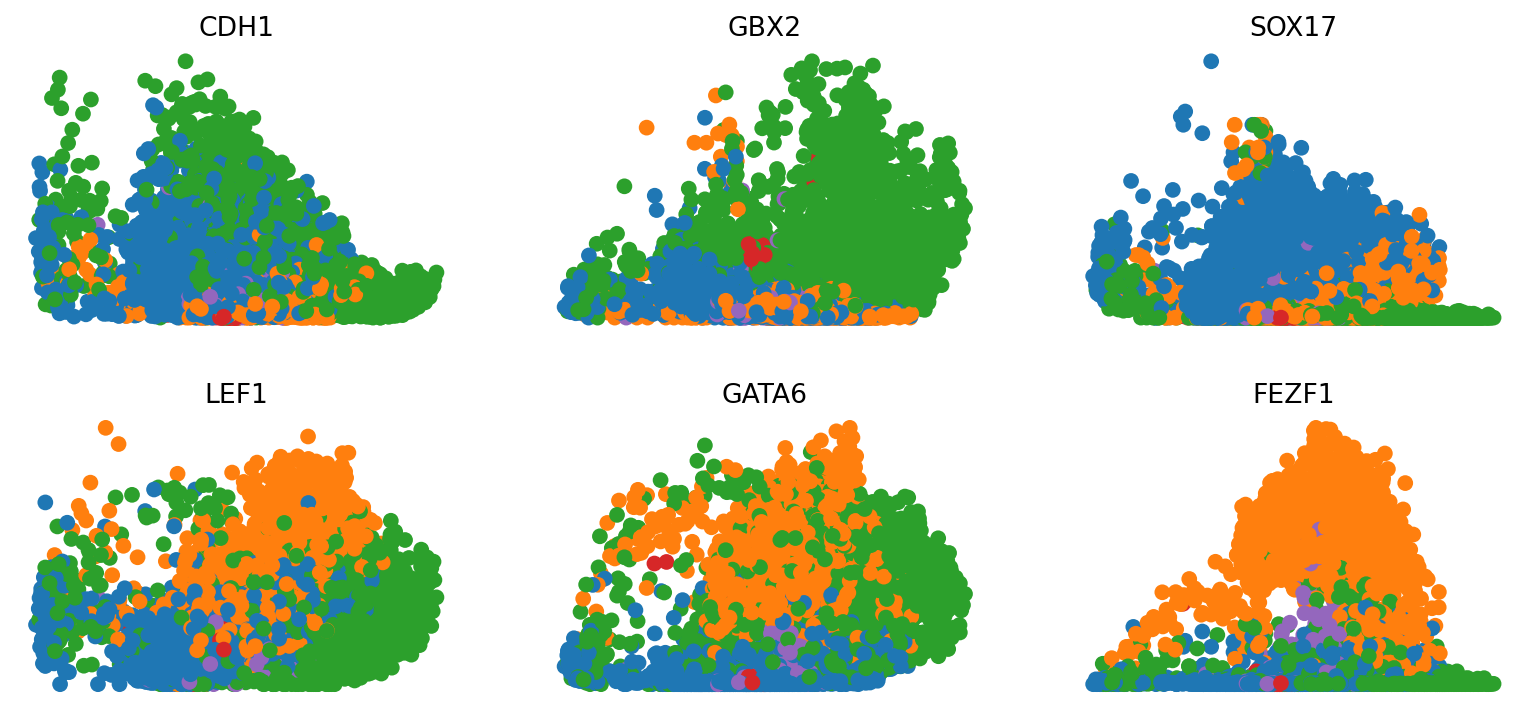

In [107]:
hgnc = ["SOX17","TBXT","GATA6","OTX2","GBX2",'LEF1',"FEZF1",'CDH1']
genes = scv.utils.convert_to_ensembl(hgnc).ensembl.values
genes2 = dict(zip(genes, hgnc))
genes = list(set(genes) & set(adata.var_names))
sub = {k: genes2[k] for k in genes2.keys() & genes}
genes3 = list(sub.values())
scv.pl.scatter(adata, x='latent_time', y=genes,color='clusters2',frameon=False, nrows=2,size=200, title=genes3)

In [ ]:
scv.pl.scatter(adata, color='latent_time', color_map='viridis', size=300)